In [1]:
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import yellowbrick as yb

from yellowbrick.features import RadViz
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LogisticRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def connectDB(DB):
    # connect to the PostgreSQL server
    return psycopg2.connect(
        database=DB,
        user="postgres",
        password="Georgetown16",
        host="database-1.c5vispb5ezxg.us-east-1.rds.amazonaws.com",
        port='5432')

def disconnectDB():
    cur.close()
    conn.close()

In [3]:
conn = connectDB("Dataset")

# extract everything from 'table_name' into a dataframe
df = pd_sql.read_sql(f"select * from public.\"featureSTG\" ", con=conn)
#code to be able to view all the columns in pandas dataframe
pd.set_option('display.max_columns', 50) 
              

In [4]:
# feature_list = df[['year','term','module_domain','region','gender','disability','half_sum_clicks',
#                    'age_band','module_presentation_length','num_of_prev_attempts','final_result',
#                    'highest_education','imd_band','studied_credits']]

feature_list = df[['code_module', 'module_presentation_length','term', 'num_of_prev_attempts',
                    'final_result', 'date_registration', 'disability', 'gender', 'age_band', 'region', 'highest_education', 
                    'imd_band', 'studied_credits', 'b4_sum_clicks', 'half_sum_clicks', 'code_module', 'std_half_score']]

In [5]:
feature_list = df.loc[(df.year == 0)&(df.module_domain==1)]

In [6]:
df_temp = feature_list

#remove null values
#df_temp = df_temp.dropna()
feature_list = feature_list.dropna()

In [7]:
#save dataset to desktop in CSV
#df_temp.to_csv('dataset_not_mapped.csv')

In [8]:
feature_list.tail()

,level_0,index,id_student,code_module,module_domain,module_presentation_length,term,year,num_of_prev_attempts,final_result,date_registration,disability,gender,age_band,region,highest_education,imd_band,studied_credits,b4_sum_clicks,qtr_sum_clicks,half_sum_clicks,threeqtr_sum_clicks,qtr_half_sum_clicks,half_threeqtr_sum_clicks,thrd_sum_clicks,twothrd_sum_clicks,thrd_twothrd_sum_clicks,allclicks,std_half_score
32548,32548,32548,2692186,3.0,1,261,0,0,1,1,-44.0,1,1,0,4,1,2.0,60,30.0,370.0,568.0,640.0,198.0,72.0,468.0,633.0,100.0,708.0,77.916667
32557,32557,32557,2693243,3.0,1,240,1,0,0,1,-204.0,0,1,1,10,1,5.0,60,184.0,818.0,1399.0,1893.0,609.0,494.0,993.0,1796.0,406.0,2643.0,88.859649
32567,32567,32567,2694933,3.0,1,240,1,0,0,1,-34.0,1,1,0,7,2,1.0,60,77.0,352.0,540.0,674.0,188.0,134.0,445.0,658.0,95.0,935.0,82.017544
32569,32569,32569,2695608,3.0,1,261,0,0,0,1,-67.0,0,1,2,3,2,9.0,60,111.0,792.0,1484.0,2095.0,692.0,611.0,885.0,1896.0,599.0,3252.0,84.083333
32584,32584,32584,2698535,4.0,1,268,0,0,0,1,-74.0,0,0,0,9,1,5.0,60,22.0,1950.0,3256.0,3327.0,1378.0,71.0,2368.0,3321.0,888.0,3455.0,60.222222


# Feature Selection

In [9]:
X = df_temp[["half_sum_clicks","gender","highest_education", "code_module", "studied_credits"]].values
        
y = df_temp["final_result"].values

//anaconda3/lib/python3.7/site-packages/yellowbrick/utils/nan_warnings.py:78: DataWarning: Warning! Found 4829 rows of 8190 (58.96%) with nan values. Only complete rows will be plotted.
  warnings.warn(warning_message, DataWarning)


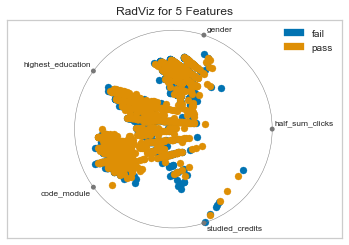

In [11]:
classes = ["fail", "pass"]
features = ["half_sum_clicks", "gender", "highest_education", "code_module", "studied_credits"]
        
sns.set_palette("colorblind")
# Instantiate the visualizer
visualizer = RadViz (
    classes=classes,
    features = features
)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

In [ ]:
df_plot = df[["final_result","gender", "highest_education", "allclicks","num_of_prev_attempts", "studied_credits"]]
g = sns.pairplot(df_plot, hue="final_result")
plt.show()

In [ ]:
y

In [ ]:

#accuracy_score(test_y, predictions)

In [ ]:
feature_list.head()

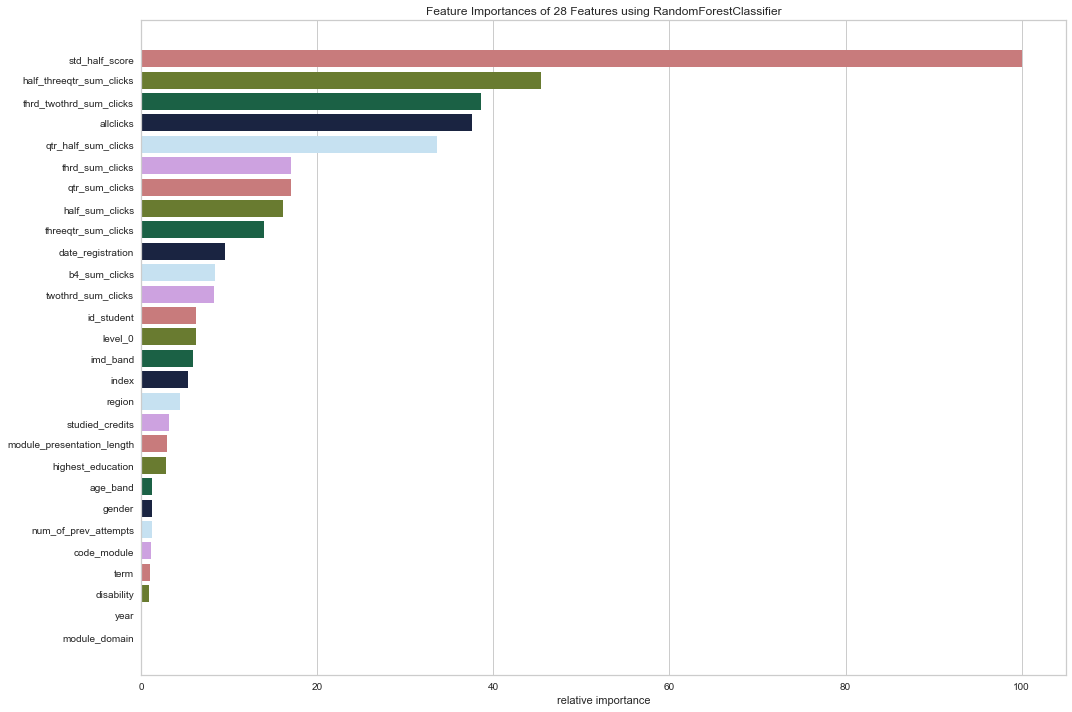

In [12]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

sns.set_palette("cubehelix")

X = feature_list[feature_list.columns.drop(['final_result'])]

y = feature_list['final_result']

model = RandomForestClassifier(n_estimators=10)
feature_list = FeatureImportances(model, size=(1080, 720))
feature_list.fit(X, y)

feature_list.show()

//anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


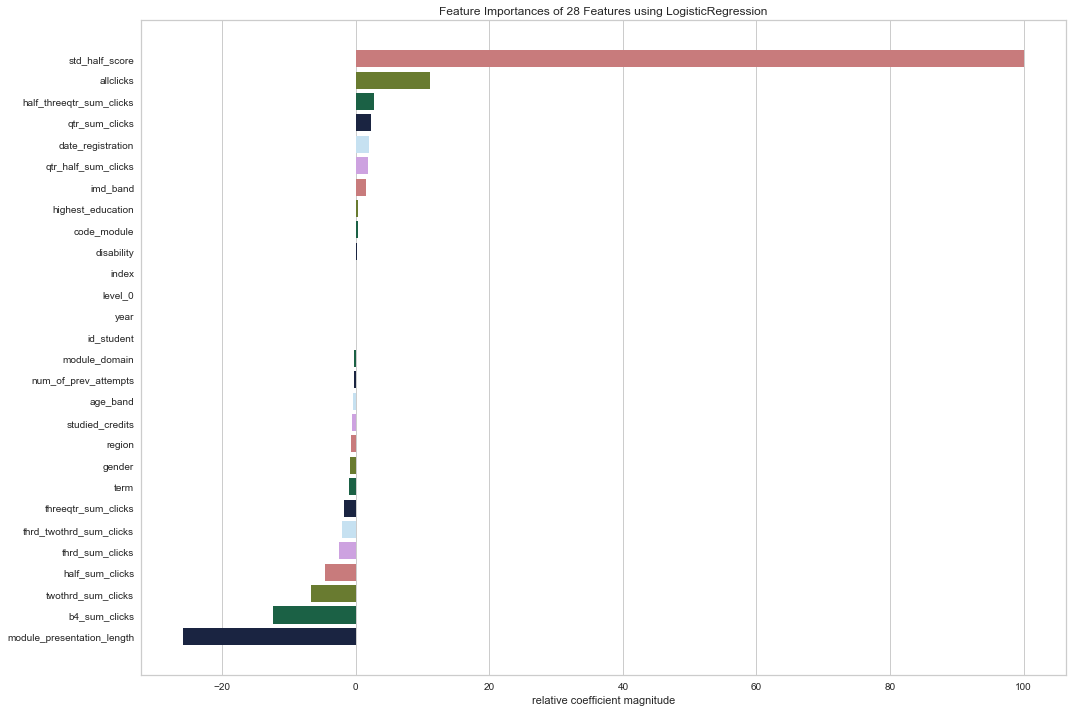

In [14]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)

viz.show()

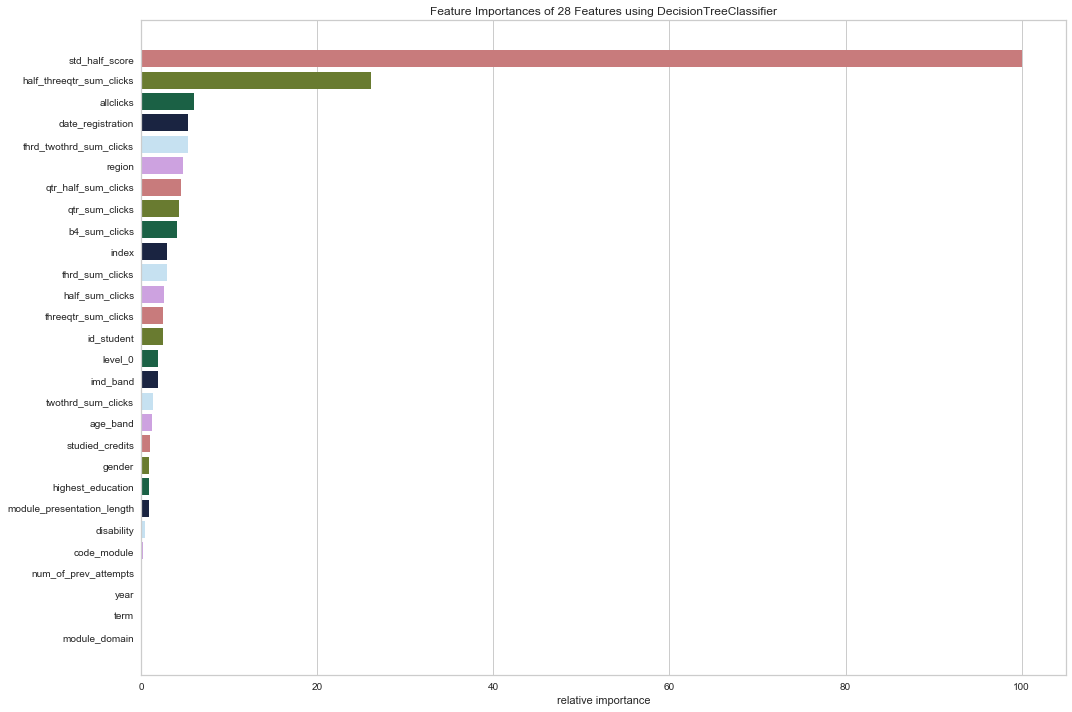

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [ ]:
df_temp = RandomForestClassifier()
df_temp.fit(X, y)
predictions = df_temp.predict(X)
    
accuracy_score(y, predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression

#X = feature_list2[feature_list2.columns.drop(['final_result'])]
            
#y = feature_list2['final_result']

model = LogisticRegression()
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [ ]:
features = df_temp[df_temp.columns.drop(['final_result'])]
label = df_temp['final_result']

In [ ]:
model = ElasticNet()
esfm = SelectFromModel(model)
esfm.fit(features, label)
print(list(features.iloc[:, esfm.get_support(indices=True)]))

In [ ]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

In [ ]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

In [ ]:
elastic_data = df[list(features.iloc[:, esfm.get_support(indices=True)])]

In [ ]:
corr = elastic_data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#plt.savefig('feature_correlation_heatmap.png', dpi=100)  #code to save image onto desktop